### Description : This the sentiment analysis of twitter 

In [1]:
# Importing the libries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

In [1]:
# get the credintials
consumer_key = "GET YOUR KEYS"
consumer_secret = "GET YOUR KEYS"
access_key = "GET YOUR KEYS"
access_secret = "GET YOUR KEYS"


In [7]:
#crete the authonticate object
authenticate=tweepy.OAuthHandler(consumer_key,consumer_secret)


# crete the access token and the access token secret
authenticate.set_access_token(access_key,access_secret)

#crete the API object while passing the auth info.
api = tweepy.API(authenticate,wait_on_rate_limit = True)

In [9]:
# Extract the 100 tweets from the twitter user
post = api.user_timeline(screen_name = "kunalb11", count=100 , lang="en" , tweet_mode = "extended")


#print the last 5 tweets from the user's account
i=1
for tweet in post[0:5]:
    print(str(i)+ '-' +tweet.full_text + '\n')
    i+=1


1-Thought experiment: What would happen if all Indian households sold their gold and bought blue chip stocks today?

 (Value of Gold owned by India households is approx ~1.5 trillion dollars. Total stock market is worth ~3 trillion dollars).

2-@banglani @jainmayank_943 Majority of outbound on UPI is done by less than 30M customers.

3-RT @lessin: With financial capital there is an 'illiquidity penalty' you pay for owning something that is hard to transact.  With things th…

4-@tarukapoor How many seasoned investors have seen as many unicorns under their watch in a year? And can we call them seasoned if they’ve not seen something like this before?

5-@banglani Don’t worry they’ll shrink it soon to short one.



In [10]:
# crete a dataframe called tweets
df = pd.DataFrame([tweet.full_text for tweet in post] , columns = ['Tweets'])


In [12]:
df.head()

,Tweets
0,Thought experiment: What would happen if all I...
1,@banglani @jainmayank_943 Majority of outbound...
2,RT @lessin: With financial capital there is an...
3,@tarukapoor How many seasoned investors have s...
4,@banglani Don’t worry they’ll shrink it soon t...


## Cleaning the data

In [15]:
#Clean the text

#Def a func to clen the text
def cleanText(text):
    text=re.sub(r'@[A-Za-z0-9]+',"",text) #removing the @mentions
    text=re.sub(r'#',"",text) #removing the "#" symbol
    text=re.sub(r'RT[\s]+',"",text) #removing the RT
    text=re.sub(r'https?:\/\/\S+','',text) #removing the hyperlinks
    
    return text

#cleaning the text 
df['Tweets']=df['Tweets'].apply(cleanText)

#show the clen text
df.sample(10)

,Tweets,Subjectivity,Polarity
13,I suffer from anxiety as a medical condition....,0.000000,0.000000
87,Insecurity is a good fuel to start but detachm...,0.800000,0.350000
98,A great way to predict long term success and f...,0.290000,0.146667
64,Gods are scarce but religions are abundant.,0.950000,0.600000
56,Delaying feedback to those who impact your lif...,0.000000,0.000000
50,: True domain expertise is domain knowledge mi...,0.466667,0.200000
2,: With financial capital there is an 'illiquid...,0.270833,-0.145833
88,People with no tact solely rely on brute. \n\n...,1.000000,0.000000
45,"Startups are mostly blood, sweat, tears and fa...",0.500000,0.500000
35,"_S_Bhogal: My peoples, the time has come for a...",0.000000,0.000000


## Calculating Subjectivity and Polarity


In [16]:
#create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#create a func to get the the polority
def getPolarity(text):
    return TextBlob(text).sentiment.polarity


#add the two columns subjectivity and polarirty
df['Subjectivity'] = df["Tweets"].apply(getSubjectivity)
df['Polarity'] = df["Tweets"].apply(getPolarity)

#show the new dataframe
df.head()

,Tweets,Subjectivity,Polarity
0,Thought experiment: What would happen if all I...,0.316667,0.100000
1,_943 Majority of outbound on UPI is done by l...,0.066667,-0.166667
2,: With financial capital there is an 'illiquid...,0.270833,-0.145833
3,How many seasoned investors have seen as many...,0.375000,0.375000
4,Don’t worry they’ll shrink it soon to short one.,0.300000,0.000000


## Ploting the word Cloud


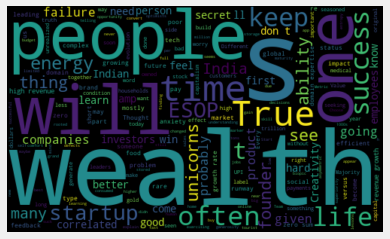

In [19]:

allWord = " ".join( [tweet for tweet in df["Tweets"]] )
wordCloud = WordCloud(width=500,height=300,random_state = 50,max_font_size=150).generate(allWord)

plt.imshow(wordCloud,interpolation = "bilinear")
plt.axis('off')
plt.show()

In [20]:
# create a function to analysis the tweet as positive negative and neutral
def getAnalysis(score):
    if score == 0:
        return 'Neutral'
    elif score < 0:
        return 'Negative'
    else:
        return 'Positive'

df["Analysis"] = df["Polarity"].apply(getAnalysis)


<AxesSubplot:xlabel='Analysis', ylabel='count'>

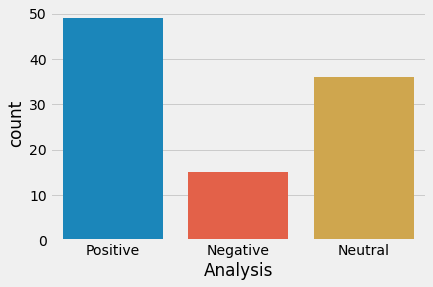

In [21]:
sns.countplot(x=df['Analysis'],data=df)

In [22]:
# print all the positive tweets
j=1
sortedDf = df.sort_values(by=['Polarity'])
for i in range(0,sortedDf.shape[0]):
    if sortedDf['Analysis'][i] == "Positive":
        print (str(j) + "-" + sortedDf.Tweets[i])
        print()
        j+=1

1-Thought experiment: What would happen if all Indian households sold their gold and bought blue chip stocks today?

 (Value of Gold owned by India households is approx ~1.5 trillion dollars. Total stock market is worth ~3 trillion dollars).

2- How many seasoned investors have seen as many unicorns under their watch in a year? And can we call them seasoned if they’ve not seen something like this before?

3-Most startups need leaders who can adjust strategy to match runway of the startup. 

If leaders who were good at surviving a short runway don’t evolve to build for a long runway, org keeps doing myopic actions.

4- All these 3 are needed for sustained and high revenue growth rate.

5-Tech investors are actually high revenue growth rate investors. 

Often high revenue growth companies are tech companies. 

Often tech companies don’t have high revenue growth rate.

6-It’s easy to make followers feel important by using bait words like “thoughts?” on social media at end of your post. 



In [23]:
# print all the negative tweets
j=1
sortedDf = df.sort_values(by=['Polarity'], ascending=False)
for i in range(0,sortedDf.shape[0]):
    if sortedDf['Analysis'][i] == "Negative":
        print (str(j) + "-" + sortedDf.Tweets[i])
        print()
        j+=1

1- _943 Majority of outbound on UPI is done by less than 30M customers.

2-: With financial capital there is an 'illiquidity penalty' you pay for owning something that is hard to transact.  With things th…

3-It’s hard to be feedback seeking when you’re wired to be validation seeking.

4-A common trait between bad doctors and bad product managers: poor diagnosis leading to over prescription often leading to side effects and the original problem continuing.

5-If capitalism was renamed to evolution, it would generate way less hate.

6- That’s probably also due to tax liability issue on ESOP on unrealized gain not due to generosity.

7-What’s changed in Indian startups: volume of unicorns 🦄. 

What’s not changed in Indian startups: the zero-sum mindset of founders &amp; lack of generosity. 

It’s extremely hard to get people who competed hard for marks, jobs &amp; success in life to accept this time it is different

8-Oversensitive people often over parent themselves when hurt by someone

## Ploting the scatter plot between Polarity & Subjectivity


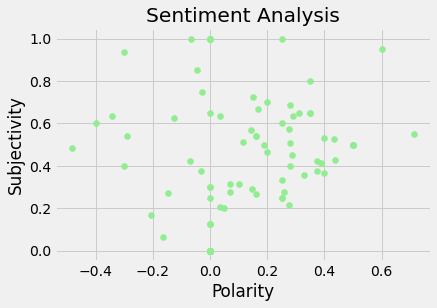

In [25]:
for i in range(0,df.shape[0]):
    plt.scatter(df.Polarity[i],df.Subjectivity[i],color='lightgreen')
plt.title("Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel('Subjectivity')

plt.show()